<a href="https://colab.research.google.com/github/RahulRajeev88/-ML-Projects/blob/master/Spotify_User_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project:Understanding Spotify User Behavior: A Data Analysis Study**

Aim 1: Determine whether Users are willing to take premium subscription or Not by using Supervised Machine learning models.

Aim 2: To find whether there exist a pattern of what device users prefer Depending upon their Music listening Mood using K Means Clustering.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [160]:
df=pd.read_excel('/content/Spotify_data.xlsx')
df

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


**Creating a copy for clustering.**


In [161]:
df1=df.copy()

In [162]:
df.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [163]:
df.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

**Exploratory Data Analysis**

In [164]:
age=df['Age'].value_counts()
age

20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: Age, dtype: int64

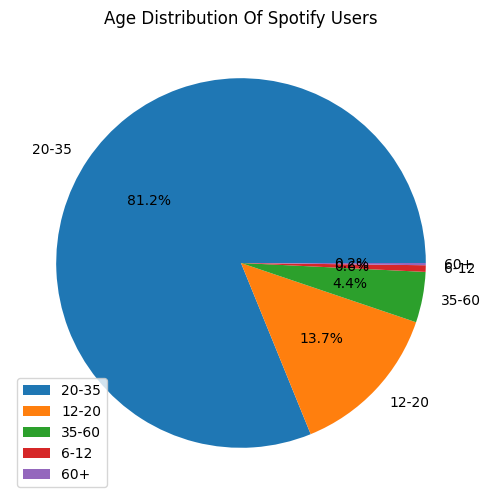

In [165]:
#Age Grups
plt.figure(figsize=(6,6))
labels=['20-35','12-20','35-60','6-12','60+']
plt.pie(age,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Age Distribution Of Spotify Users')
plt.show()


In [166]:
#Gender
gender=df['Gender'].value_counts()
gender

Female    391
Male      114
Others     15
Name: Gender, dtype: int64

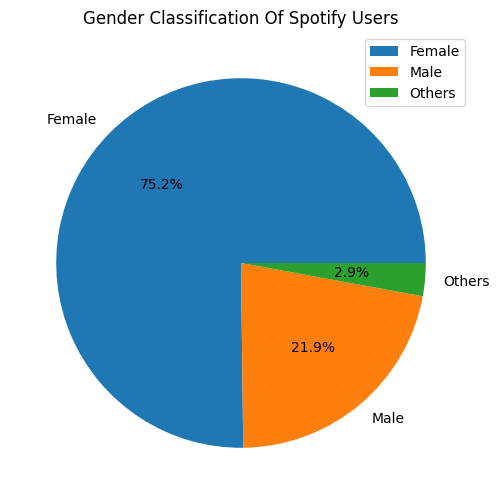

In [167]:
plt.figure(figsize=(6,6))
labels=['Female','Male','Others']
plt.pie(gender,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Gender Classification Of Spotify Users')
plt.show()

<Axes: xlabel='spotify_subscription_plan', ylabel='count'>

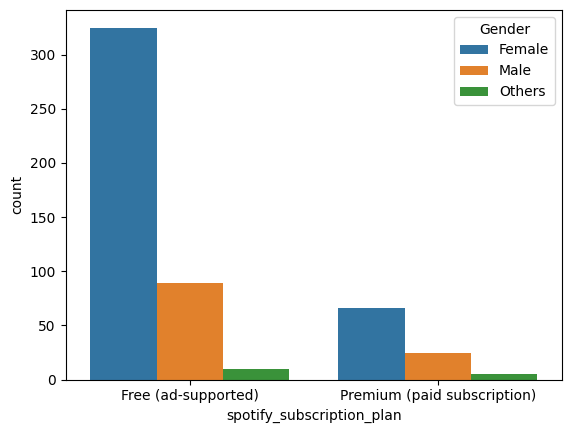

In [168]:
#Spotify subscription plan
sns.countplot(x='spotify_subscription_plan',data=df,hue='Gender')


<Axes: xlabel='premium_sub_willingness', ylabel='count'>

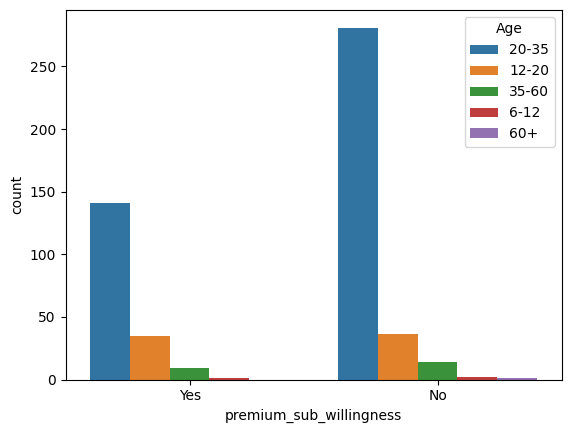

In [169]:
#Willingnes to take subscription
sns.countplot(x='premium_sub_willingness',data=df,hue='Age')

In [170]:
sub_will=df['premium_sub_willingness'].value_counts()
sub_will

No     334
Yes    186
Name: premium_sub_willingness, dtype: int64

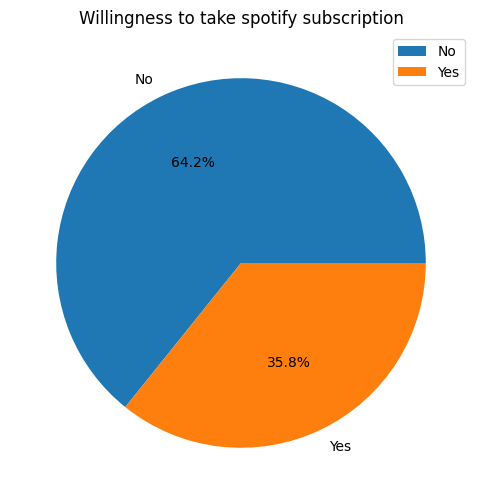

In [171]:
#Premium Subscription willingness
plt.figure(figsize=(6,6))
labels=['No','Yes']
plt.pie(sub_will,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Willingness to take spotify subscription')
plt.show()

In [172]:
genre=df['fav_music_genre'].value_counts().values
genre

array([259,  87,  85,  55,  16,   6,   4,   4,   2,   1,   1])

In [173]:
fav_genre=df['fav_music_genre'].unique()
fav_genre

array(['Melody', 'Rap', 'Pop', 'Classical & melody, dance', 'classical',
       'Rock', 'Old songs', 'Electronic/Dance', 'All', 'Kpop',
       'trending songs random'], dtype=object)

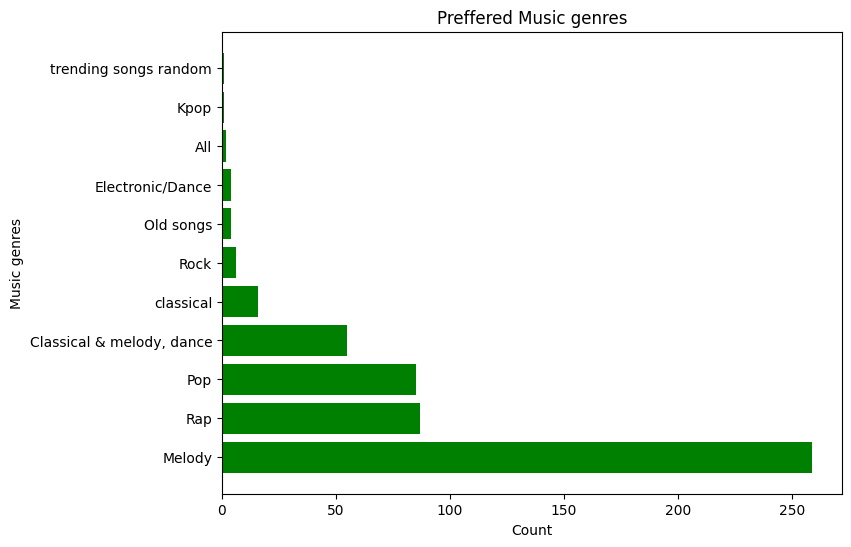

In [174]:
fig,ax=plt.subplots(figsize=(8,6))
plt.barh(fav_genre,genre,color='g')
plt.xlabel('Count')
plt.ylabel('Music genres')
plt.title('Preffered Music genres')
plt.show()

In [175]:
#Preffered Listening Content
plc=df['preferred_listening_content'].value_counts()
plc

Music      410
Podcast    110
Name: preferred_listening_content, dtype: int64

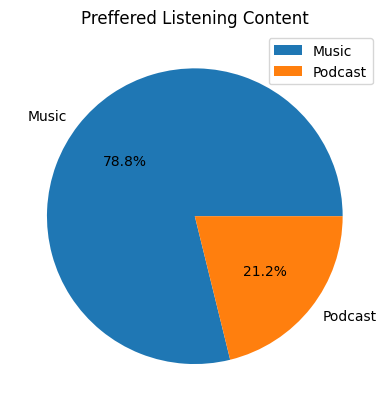

In [176]:
labels=['Music','Podcast']
plt.pie(plc,labels=labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Preffered Listening Content')
plt.show()

In [177]:
music_rec=df['music_recc_rating'].value_counts()
music_rec

3    190
4    174
5     86
2     56
1     14
Name: music_recc_rating, dtype: int64

In [178]:
music_rec_val=df['music_recc_rating'].value_counts().values
music_rec_val

array([190, 174,  86,  56,  14])

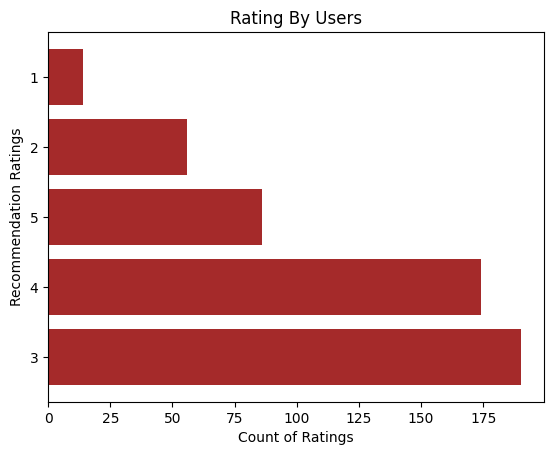

In [179]:
music=['3','4','5','2','1']
plt.barh(music,music_rec_val,color='brown')
plt.xlabel('Count of Ratings')
plt.ylabel('Recommendation Ratings')
plt.title('Rating By Users')
plt.show()

**Key Findings from Exploratory Data Analysis**

   The age group that uses Spotify more is between **20 and 35**, followed by the age group between 12 and 20.

   A larger proportion of users in this dataset comprises females rather than males.

   Most of the users prefer the free ad-supported plan over premium plans, and premium users are mostly **females**.

   People between the age group of **20 and 35** use **premium plan**s more often.

   **35.8%** of people are willing to take the premium plan and also continue with the premium subscription.

   Most of the people prefer listening to **music** over podcasts.

   Their favorite music genre is **melody**.

   Most of the users listen to songs using Spotify **recommendations**, and they have given a **rating of 3**.

    



In [180]:
df.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [181]:
le=LabelEncoder()
lst=['Age','Gender','spotify_usage_period','spotify_listening_device','spotify_subscription_plan','premium_sub_willingness','preffered_premium_plan','preferred_listening_content','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','music_recc_rating','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [182]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,1,0,3,4,0,1,1,1,4,2,8,34,4,2,0,1,2,0,0,1
1,0,1,3,0,0,1,2,1,7,0,10,32,4,1,4,1,2,0,2,2
2,2,2,1,4,0,1,4,1,6,2,0,19,4,3,2,17,2,1,0,2
3,1,0,0,11,0,0,3,0,4,2,3,13,13,3,1,12,3,1,2,1
4,1,0,0,6,0,0,3,0,4,2,0,34,13,3,3,10,4,2,0,1


**Splitting the dataset for chisquare test**

In [183]:
X=df.drop(['premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']

**Chi Square Test for feature selection**

In [184]:
selector=SelectKBest(score_func=chi2,k=15)

In [185]:
X_new=selector.fit_transform(X,y)

In [186]:
selected_feature_indices=selector.get_support(indices=True)

In [187]:
selected_features=X.columns[selected_feature_indices]

In [188]:
selected_features

Index(['Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'preffered_premium_plan',
       'preferred_listening_content', 'fav_music_genre', 'music_time_slot',
       'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method',
       'pod_lis_frequency', 'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

**Splitting the dataset for model building**

In [189]:
X1=df.drop(['Age','music_recc_rating','fav_pod_genre','preffered_pod_format','premium_sub_willingness'],axis=1)
y=df['premium_sub_willingness']

**Feature Scaling Used By MinMaxScaler**

In [190]:
ms=MinMaxScaler()
Xsc=ms.fit_transform(X1)
Xsc

array([[0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.25      ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.66666667,
        0.5       ],
       [1.        , 0.33333333, 0.28571429, ..., 0.33333333, 0.        ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.42857143, ..., 0.        , 1.        ,
        0.25      ],
       [0.        , 0.33333333, 0.42857143, ..., 0.        , 0.33333333,
        0.5       ],
       [0.        , 1.        , 0.5       , ..., 0.33333333, 0.66666667,
        0.25      ]])

**Model Building**

In [191]:
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.2,random_state=2)

In [192]:
X_train.shape

(416, 15)

In [193]:
y_train.shape

(416,)

**K Nearest Neighbors**

In [194]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        66
           1       0.87      0.68      0.76        38

    accuracy                           0.85       104
   macro avg       0.85      0.81      0.83       104
weighted avg       0.85      0.85      0.84       104



**Support Vector Machine**



In [195]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        66
           1       0.88      0.61      0.72        38

    accuracy                           0.83       104
   macro avg       0.85      0.78      0.80       104
weighted avg       0.84      0.83      0.82       104





**Naive Bayes Classifier**


In [196]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        66
           1       0.79      0.79      0.79        38

    accuracy                           0.85       104
   macro avg       0.83      0.83      0.83       104
weighted avg       0.85      0.85      0.85       104



**Decision Tree**

In [197]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        66
           1       0.73      0.71      0.72        38

    accuracy                           0.80       104
   macro avg       0.78      0.78      0.78       104
weighted avg       0.80      0.80      0.80       104



**Decision Tree Hypertuning**

In [198]:
parameters = {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(dt,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [199]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [200]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=2)
dt1.fit(X_train,y_train)
y_predd=dt1.predict(X_test)
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.83      0.76      0.79        38

    accuracy                           0.86       104
   macro avg       0.85      0.84      0.84       104
weighted avg       0.85      0.86      0.85       104



**Random Forest**

In [201]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        66
           1       0.82      0.74      0.78        38

    accuracy                           0.85       104
   macro avg       0.84      0.82      0.83       104
weighted avg       0.84      0.85      0.84       104



**Random Forest Hypertuning**

In [202]:
parameters = {'n_estimators': [100, 200, 300],'max_depth': [None, 5, 10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
clf=GridSearchCV(rf,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [203]:
print(clf.best_params_)



{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [204]:
rf1=RandomForestClassifier(n_estimators=100,min_samples_leaf=4,min_samples_split=10,max_depth=10)
rf1.fit(X_train,y_train)
y_predr=rf1.predict(X_test)
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        66
           1       0.76      0.68      0.72        38

    accuracy                           0.81       104
   macro avg       0.80      0.78      0.79       104
weighted avg       0.81      0.81      0.81       104



**AdaBoost Classifier**

In [205]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred5=ad.predict(X_test)
print(classification_report(y_test,y_pred5))


              precision    recall  f1-score   support

           0       0.79      0.88      0.83        66
           1       0.74      0.61      0.67        38

    accuracy                           0.78       104
   macro avg       0.77      0.74      0.75       104
weighted avg       0.78      0.78      0.77       104



**AdaBoost Hypertuning**

In [206]:
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0]}
clf=GridSearchCV(ad,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [207]:
print(clf.best_params_)



{'learning_rate': 0.1, 'n_estimators': 100}


In [208]:
ad1=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
ad1.fit(X_train,y_train)
y_preda=ad1.predict(X_test)
print(classification_report(y_test,y_preda))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.83      0.76      0.79        38

    accuracy                           0.86       104
   macro avg       0.85      0.84      0.84       104
weighted avg       0.85      0.86      0.85       104



**Gradient Boosting**

In [209]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred6=gb.predict(X_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        66
           1       0.78      0.66      0.71        38

    accuracy                           0.81       104
   macro avg       0.80      0.78      0.78       104
weighted avg       0.81      0.81      0.80       104



**Gradient Boosting Hypertuning**

In [ ]:
parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0],'max_depth': [3, 5, 7]}
clf=GridSearchCV(gb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)



In [210]:
print(clf.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


In [211]:
gb1=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50)
gb1.fit(X_train,y_train)
y_predg=gb1.predict(X_test)
print(classification_report(y_test,y_predg))



              precision    recall  f1-score   support

           0       0.85      0.92      0.88        66
           1       0.84      0.71      0.77        38

    accuracy                           0.85       104
   macro avg       0.85      0.82      0.83       104
weighted avg       0.85      0.85      0.84       104



**XG boost**

In [212]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        66
           1       0.72      0.74      0.73        38

    accuracy                           0.80       104
   macro avg       0.78      0.79      0.78       104
weighted avg       0.80      0.80      0.80       104



**Xg Boost Hypertuning**

In [213]:
parameters = {'max_depth': [3, 5, 7],'learning_rate': [0.1, 0.5, 1.0],'n_estimators': [50, 100, 200],'subsample': [0.5, 0.8, 1.0],'colsample_bytree': [0.5, 0.8, 1.0]}
clf=GridSearchCV(xgb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1.0],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy')

In [214]:
print(clf.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [215]:
xgb1=XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,max_depth=3,n_estimators=50,subsample=1.0)
xgb1.fit(X_train,y_train)
y_predx=xgb1.predict(X_test)
print(classification_report(y_test,y_predx))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        66
           1       0.79      0.71      0.75        38

    accuracy                           0.83       104
   macro avg       0.82      0.80      0.81       104
weighted avg       0.83      0.83      0.82       104



Here we can observe that Decision Tree & Adaboost gives the highest accuracy after hypertuning which is 86%

**Clustering using K-Means**

In [216]:
df1

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [217]:
X=df1.drop(['Age','Gender','music_lis_frequency','fav_music_genre','spotify_usage_period','preffered_premium_plan','spotify_subscription_plan','premium_sub_willingness','music_recc_rating','preferred_listening_content','music_time_slot','music_expl_method','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction'],axis=1)
X

,spotify_listening_device,music_Influencial_mood
0,Smart speakers or voice assistants,Sadness or melancholy
1,Computer or laptop,Social gatherings or parties
2,Smart speakers or voice assistants,Relaxation and stress relief
3,"Smartphone, Smart speakers or voice assistants","Relaxation and stress relief, Social gathering..."
4,Smartphone,Relaxation and stress relief
...,...,...
515,"Smartphone, Computer or laptop, Wearable devices","Uplifting and motivational, Sadness or melancholy"
516,"Smartphone, Computer or laptop","Relaxation and stress relief, Uplifting and mo..."
517,Smartphone,Relaxation and stress relief
518,Smartphone,"Relaxation and stress relief, Uplifting and mo..."


In [218]:
le1=LabelEncoder()
le2=LabelEncoder()
X['spotify_listening_device']=le1.fit_transform(X['spotify_listening_device'])
X['music_Influencial_mood']=le2.fit_transform(X['music_Influencial_mood'])
X

,spotify_listening_device,music_Influencial_mood
0,4,8
1,0,10
2,4,0
3,11,3
4,6,0
...,...,...
515,10,12
516,7,6
517,6,0
518,6,4


**Applying Elbow Method**

In [219]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,10):
  km=KMeans(n_clusters=i,init='k-means++',random_state=4)
  km.fit(X)
  wcss.append(km.inertia_)

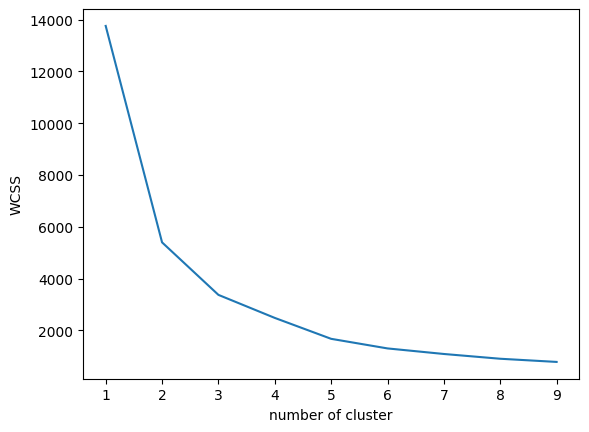

In [220]:
plt.plot(range(1,10),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [221]:
km1=KMeans(n_clusters=3,init='k-means++',random_state=4)
y_kmeans=km1.fit_predict(X)
y_kmeans

array([0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1,

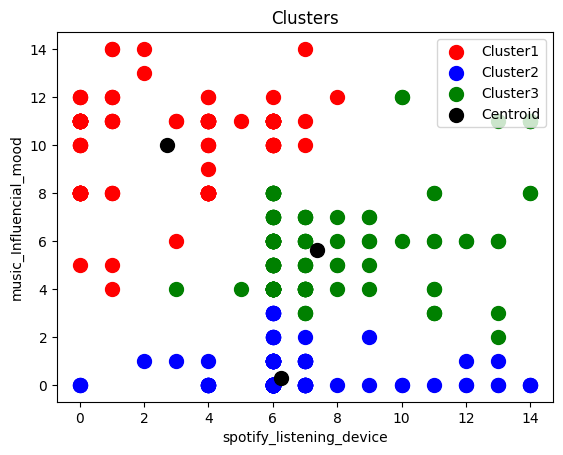

In [222]:
X=np.array(X)
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s = 100,c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s = 100,c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s = 100,c = 'green', label = 'Cluster3')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')
plt.title("Clusters")
plt.xlabel('spotify_listening_device')
plt.ylabel('music_Influencial_mood')
plt.legend()
plt.show()


In [223]:
X= pd.DataFrame(X,columns=('spotify_listening_device','music_Influencial_mood'))
y=np.array(y_kmeans)
X['cluster'] = y
X['spotify_listening_device']=le1.inverse_transform(X['spotify_listening_device'])
X['music_Influencial_mood']=le2.inverse_transform(X['music_Influencial_mood'])

In [225]:
a=X.loc[X['cluster']==0][['spotify_listening_device','music_Influencial_mood','cluster']]
a

,spotify_listening_device,music_Influencial_mood,cluster
0,Smart speakers or voice assistants,Sadness or melancholy,0
1,Computer or laptop,Social gatherings or parties,0
5,Smartphone,Uplifting and motivational,0
7,Smartphone,Social gatherings or parties,0
17,Smartphone,Social gatherings or parties,0
...,...,...,...
500,Smartphone,Uplifting and motivational,0
502,Computer or laptop,Sadness or melancholy,0
503,Smart speakers or voice assistants,Uplifting and motivational,0
506,Smart speakers or voice assistants,Uplifting and motivational,0


In [226]:
a['spotify_listening_device'].value_counts()

Computer or laptop                                                          51
Smart speakers or voice assistants                                          34
Smartphone                                                                  30
Computer or laptop, Smart speakers or voice assistants                      14
Smartphone, Computer or laptop                                               3
Computer or laptop, Wearable devices                                         3
Computer or laptop, Smart speakers or voice assistants, Wearable devices     2
Smartphone, Computer or laptop, Smart speakers or voice assistants           1
Smart speakers or voice assistants, Wearable devices                         1
Name: spotify_listening_device, dtype: int64

In [227]:
a['music_Influencial_mood'].value_counts()

Uplifting and motivational                                                                                       63
Sadness or melancholy                                                                                            40
Social gatherings or parties                                                                                     16
Uplifting and motivational, Sadness or melancholy                                                                10
Uplifting and motivational, Social gatherings or parties                                                          4
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy                                   2
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties     1
Sadness or melancholy, Social gatherings or parties                                                               1
Uplifting and motivational, Sadness or melancholy, Social gatherings or 

In [228]:
b=X.loc[X['cluster']==1][['spotify_listening_device','music_Influencial_mood','cluster']]
b

,spotify_listening_device,music_Influencial_mood,cluster
2,Smart speakers or voice assistants,Relaxation and stress relief,1
4,Smartphone,Relaxation and stress relief,1
6,Smartphone,Relaxation and stress relief,1
9,Smartphone,Relaxation and stress relief,1
12,"Smartphone, Computer or laptop",Relaxation and stress relief,1
...,...,...,...
511,Smartphone,Relaxation and stress relief,1
512,Smartphone,"Relaxation and stress relief, Sadness or melan...",1
514,Smartphone,Relaxation and stress relief,1
517,Smartphone,Relaxation and stress relief,1


In [229]:
b['spotify_listening_device'].value_counts()

Smartphone                                                                              193
Smartphone, Computer or laptop                                                           19
Smart speakers or voice assistants                                                        9
Smartphone, Wearable devices                                                              3
Computer or laptop                                                                        3
Wearable devices                                                                          3
Smartphone, Smart speakers or voice assistants, Wearable devices                          3
Smartphone, Computer or laptop, Wearable devices                                          2
Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices      2
Smartphone, Smart speakers or voice assistants                                            1
Smartphone, Computer or laptop, Smart speakers or voice assistants              

In [230]:
b['music_Influencial_mood'].value_counts()

Relaxation and stress relief                                                         195
Relaxation and stress relief, Sadness or melancholy                                   33
Relaxation and stress relief, Sadness or melancholy, Social gatherings or parties      7
Relaxation and stress relief, Social gatherings or parties                             6
Name: music_Influencial_mood, dtype: int64

In [231]:
c=X.loc[X['cluster']==2][['spotify_listening_device','music_Influencial_mood','cluster']]
c

,spotify_listening_device,music_Influencial_mood,cluster
3,"Smartphone, Smart speakers or voice assistants","Relaxation and stress relief, Social gathering...",2
8,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
10,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
11,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
13,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
...,...,...,...
510,Smartphone,"Relaxation and stress relief, Uplifting and mo...",2
513,"Smartphone, Computer or laptop, Smart speakers...","Relaxation and stress relief, Uplifting and mo...",2
515,"Smartphone, Computer or laptop, Wearable devices","Uplifting and motivational, Sadness or melancholy",2
516,"Smartphone, Computer or laptop","Relaxation and stress relief, Uplifting and mo...",2


In [232]:
c['spotify_listening_device'].value_counts()



Smartphone                                                                              77
Smartphone, Computer or laptop                                                          26
Smartphone, Smart speakers or voice assistants                                           9
Smartphone, Computer or laptop, Smart speakers or voice assistants, Wearable devices     6
Smartphone, Computer or laptop, Smart speakers or voice assistants                       5
Smartphone, Wearable devices                                                             5
Wearable devices                                                                         5
Smartphone, Computer or laptop, Wearable devices                                         3
Smartphone, Smart speakers or voice assistants, Wearable devices                         2
Computer or laptop, Wearable devices                                                     1
Smart speakers or voice assistants, Wearable devices                                     1

In [233]:
c['music_Influencial_mood'].value_counts()



Relaxation and stress relief, Uplifting and motivational                                                         43
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties    34
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy                                  20
Sadness or melancholy                                                                                            15
Relaxation and stress relief, Uplifting and motivational, Social gatherings or parties                           14
Relaxation and stress relief, Social gatherings or parties                                                        7
Uplifting and motivational                                                                                        4
Uplifting and motivational, Sadness or melancholy                                                                 2
Relaxation and stress relief, Sadness or melancholy, Social gatherings o

**Summarizing the inferences Based on the above clusters.**

-Cluster 1: Users prefer computer or laptop, Speakers or Voice Assistance(106) to hear Uplifting and motivational songs or in a party/social gathering(91).

-Cluster 2: Users prefer smartphones(may be connected to earphones)(193) to hear Relaxation and stress relief or Sad/Melancholy songs(228).

-Cluster 3: Users prefer smartphones(may be connected to earphones)(77) to hear Relaxation and stress relief or Sad/Melancholy songs Also uplifting and motivational songs(43).

In general, we can conclude that people who uses smartphones,chances are they may use headsets to listen more of Relaxation or stress relief or Sad/Melancholy songs and People tend to listen to uplifting/motivational songs or party songs in Laptops/smart speakers.